In [2]:
import PIL
import matplotlib.pyplot as plt
import numpy as np

print("Done importing")

#open the image
image = PIL.Image.open('./Code/tifs/autumn.tif')

print("Done opening image")





Done importing
Done opening image


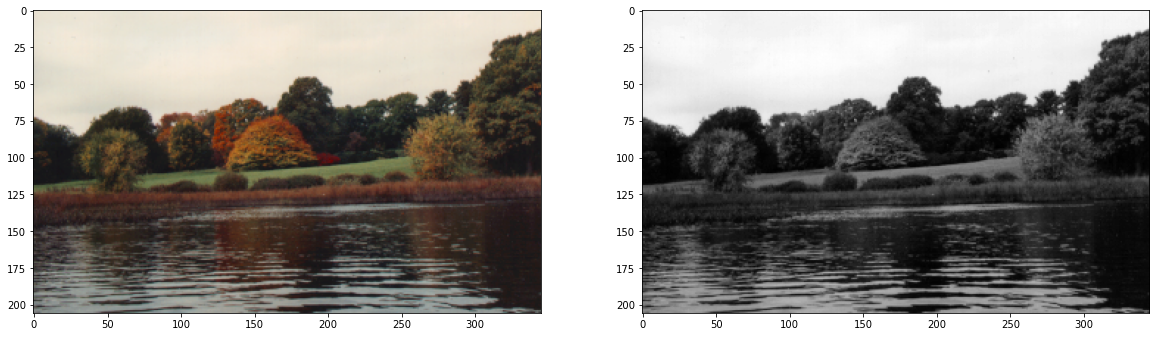

In [3]:
#if any image dimension is larger than 512, resize the image
if max(image.size) > 512:
    image = image.resize((512, 512))

#generate a black and white image
bw = image.convert('L')

#display the images side by side in a big figure
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(image)
axes[1].imshow(bw, cmap='gray')

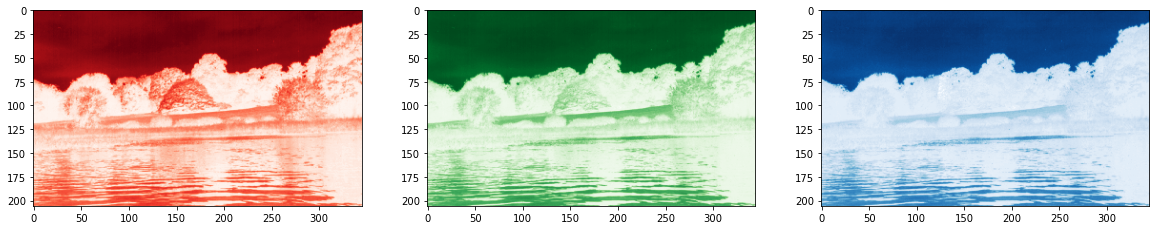

In [4]:
redchannel = image.split()[0]
greenchannel = image.split()[1]
bluechannel = image.split()[2]

#plot redchannel, greenchannel, bluechannel next to each other
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
axes[0].imshow(redchannel, cmap='Reds')
axes[1].imshow(greenchannel, cmap='Greens')
axes[2].imshow(bluechannel, cmap='Blues')

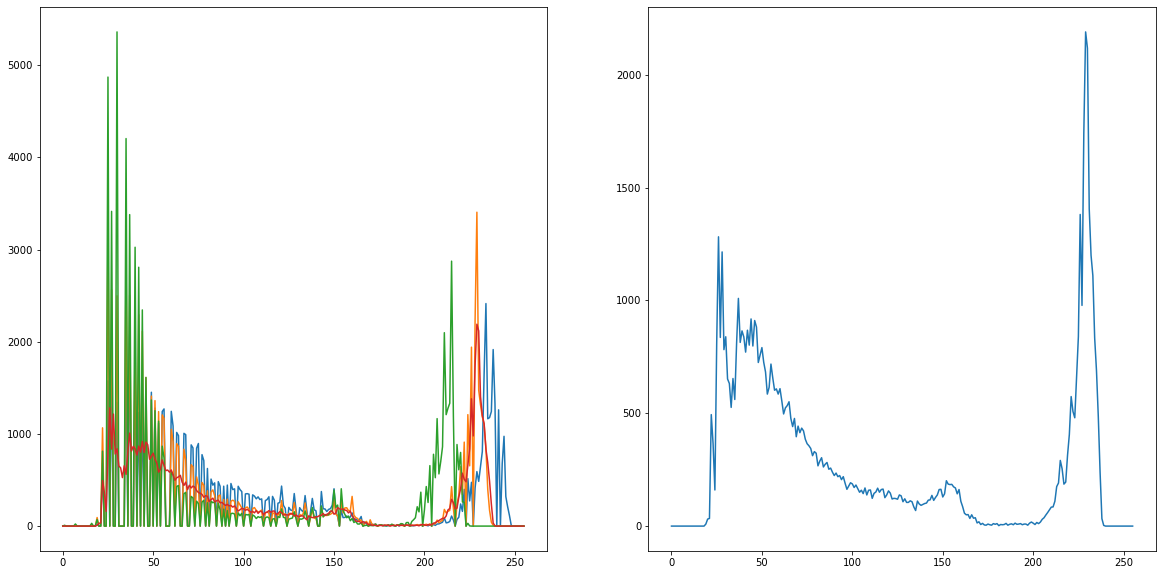

In [5]:


bwh = bw.histogram()
rh = redchannel.histogram()
gh = greenchannel.histogram()
bh = bluechannel.histogram()

#plot the histograms on the same graph
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].plot(rh)
axes[0].plot(gh)
axes[0].plot(bh)
axes[0].plot(bwh)

axes[1].plot(bwh)

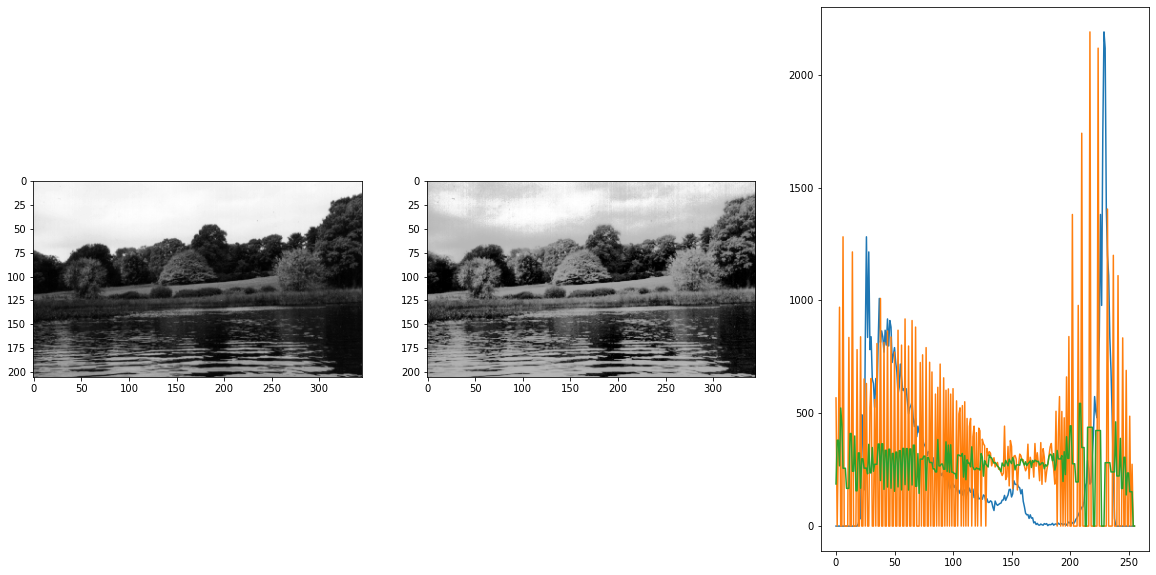

In [6]:
#accses the bw image as array 
bwarray = np.array(bw)

width = len(bwarray)
height = len(bwarray[0])

bwarray2 = np.zeros((width, height))

maxbright = 255

for i in range(width):
    for j in range(height):
        currentBright = bwarray[i][j]

        Bsum = 0 
        for k in range(currentBright):
            Bsum += bwh[k]

            
        bwarray2[i][j] = (maxbright-1)/(width*height)*Bsum

#convert bwarray2 to image
bw2 = PIL.Image.fromarray(bwarray2.astype('uint8'))
bw2h = bw2.histogram()

# create a smooth histogram
smoothed = np.zeros(256)
for i in range(256 - 2):
    smoothed[i] = (bw2h[i-2] + bw2h[i-1] + bw2h[i] + bw2h[i+1] + bw2h[i+2])/5



#show input and output image side by side with histogram
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
axes[0].imshow(bw, cmap='gray')
axes[1].imshow(bwarray2, cmap='gray')
#plot both histograms on the same graph
axes[2].plot(bwh)
axes[2].plot(bw2h)
axes[2].plot(smoothed)






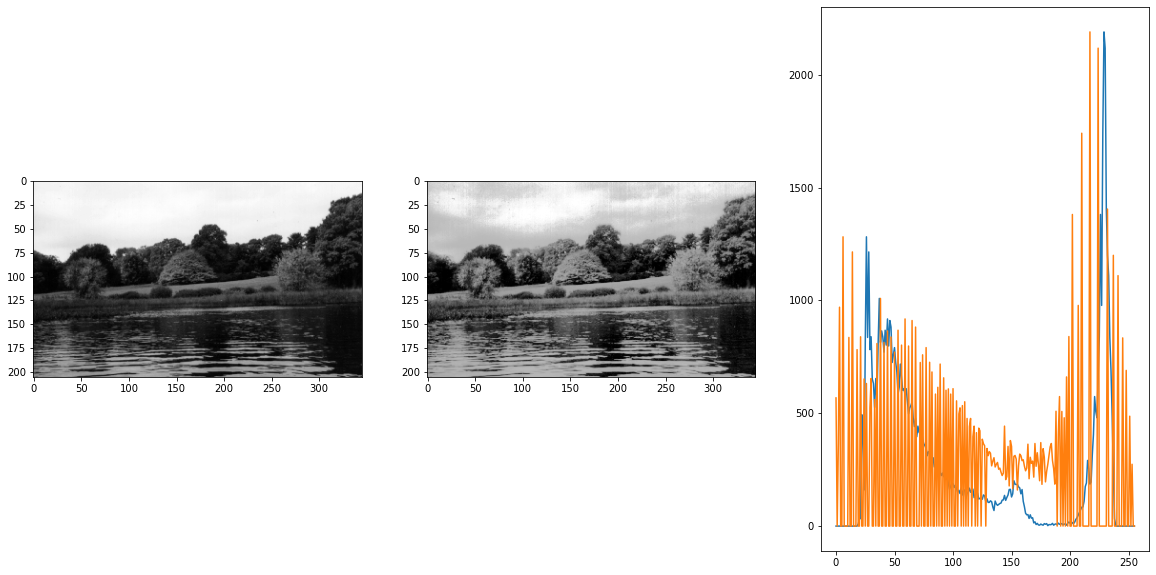

In [7]:
#accses the bw image as array 

def normalizeH(himage : PIL.Image.Image):

    himageHist = himage.histogram()

    himageArray = np.array(bw)

    Hwidth = len(himageArray)
    Hheight = len(himageArray[0])

    himageArray2 = np.zeros((Hwidth, Hheight))

    maxbright = 255

    for i in range(Hwidth):
        for j in range(Hheight):
            currentBright = himageArray[i][j]

            Bsum = 0 
            for k in range(currentBright):
                Bsum += bwh[k]

                
            himageArray2[i][j] = (maxbright-1)/(Hwidth*Hheight)*Bsum

    #convert bwarray2 to image
    himage2 = PIL.Image.fromarray(himageArray2.astype('uint8'))

    #plt.imshow(himage2, cmap = 'gray')
    return himage2


bw2 = normalizeH(bw).copy()
    

bw2h = bw2.histogram()
# create a smooth histogram

#smoothed = np.zeros(256)
#for i in range(256 - 2):
#    smoothed[i] = (bw2h[i-2] + bw2h[i-1] + bw2h[i] + bw2h[i+1] + bw2h[i+2])/5

#show input and output image side by side with histogram
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
axes[0].imshow(bw, cmap='gray')
axes[1].imshow(bw2, cmap='gray')
#plot both histograms on the same graph
axes[2].plot(bwh)
axes[2].plot(bw2h)
#axes[2].plot(smoothed)






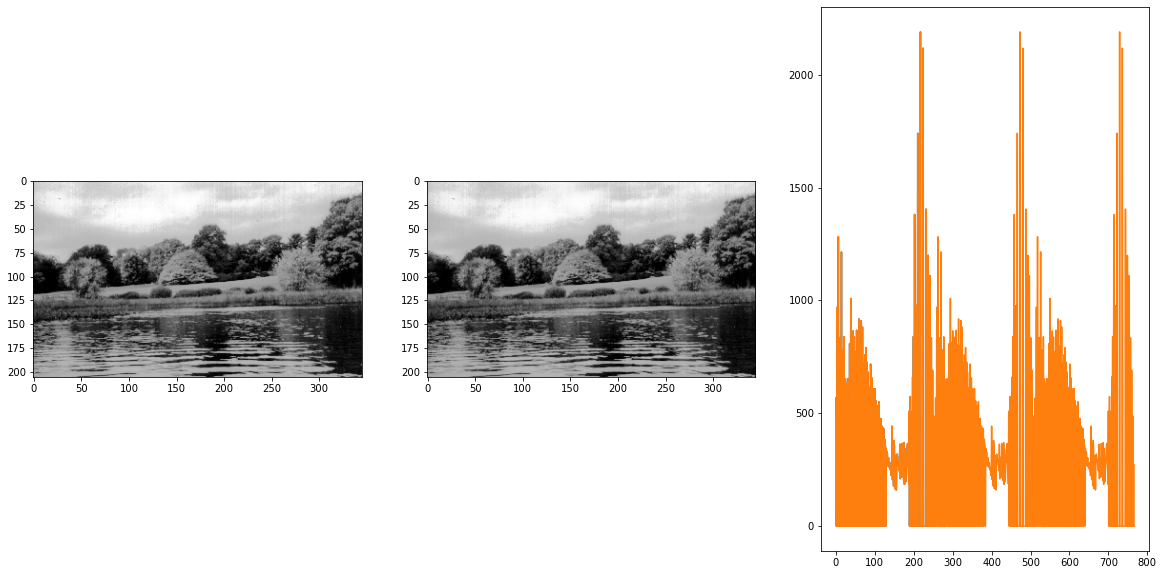

In [11]:
normR = normalizeH(redchannel)
normG = normalizeH(greenchannel)
normB = normalizeH(bluechannel)

#combine the normalized channels
normRGB = PIL.Image.merge('RGB', (normR, normG, normB))
#show input and output image side by side with histogram
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
axes[0].imshow(bw2, cmap='gray')
axes[1].imshow(normRGB)
#plot both histograms on the same graph
axes[2].plot(bw2h)
axes[2].plot(normRGB.histogram())



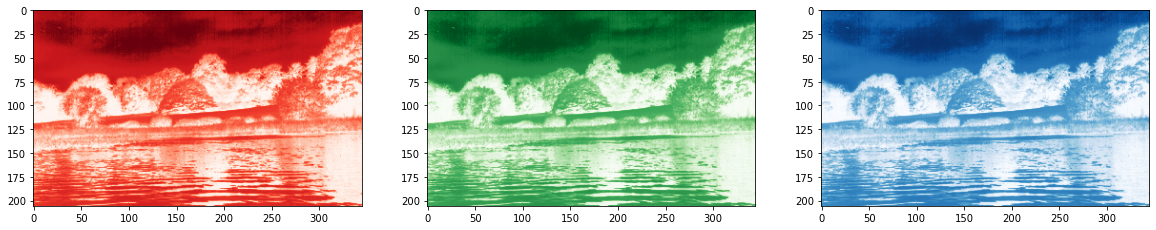

In [12]:
# plot normR, normG, normB next to each other
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
axes[0].imshow(normR, cmap='Reds')
axes[1].imshow(normG, cmap='Greens')
axes[2].imshow(normB, cmap='Blues')


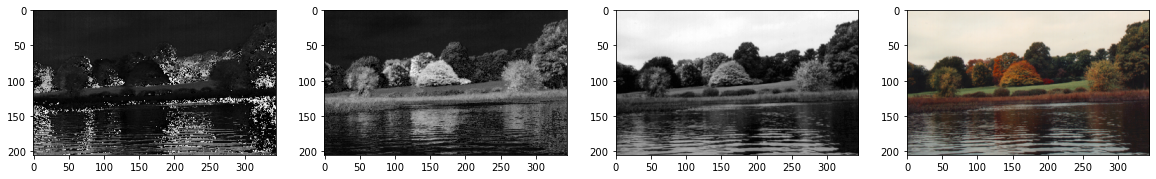

In [18]:
# convert the image to HSV 
hsv = image.convert('HSV')
#plot the channels of the HSV image
fig, axes = plt.subplots(1, 4, figsize=(20, 10))
axes[0].imshow(hsv.split()[0], cmap='gray')
axes[1].imshow(hsv.split()[1], cmap='gray')
axes[2].imshow(hsv.split()[2], cmap='gray')
axes[3].imshow(hsv)


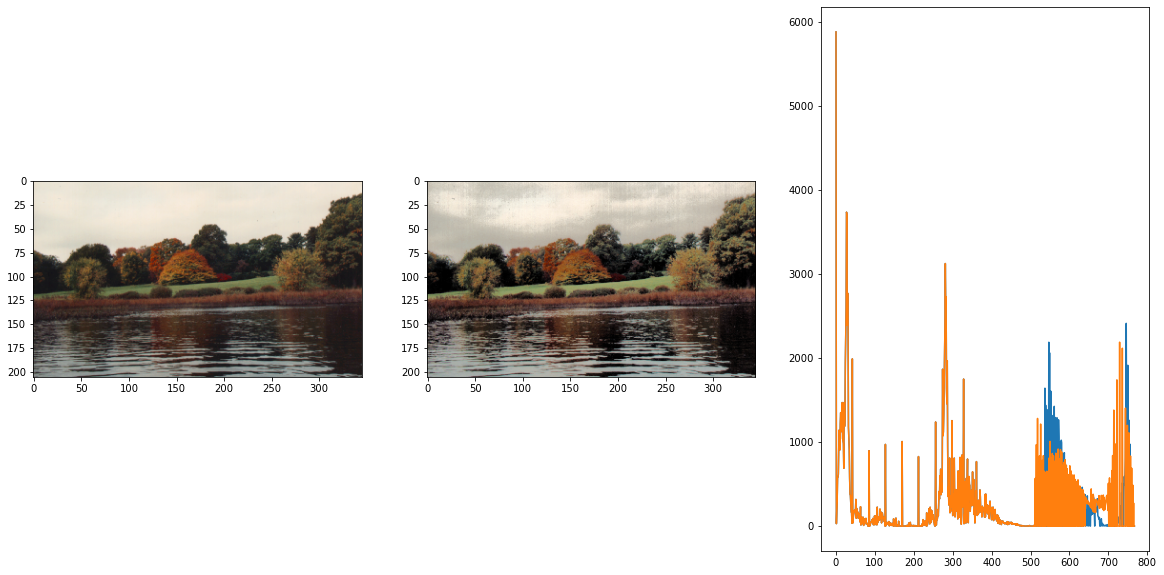

In [22]:
normV = normalizeH(hsv.split()[2])

#combine the normalized channels
normHSV = PIL.Image.merge('HSV', (hsv.split()[0], hsv.split()[1], normV))
#show input and output image side by side with histogram
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
axes[0].imshow(hsv, cmap='gray')
axes[1].imshow(normHSV)
#plot both histograms on the same graph
axes[2].plot(hsv.histogram())
axes[2].plot(normHSV.histogram())


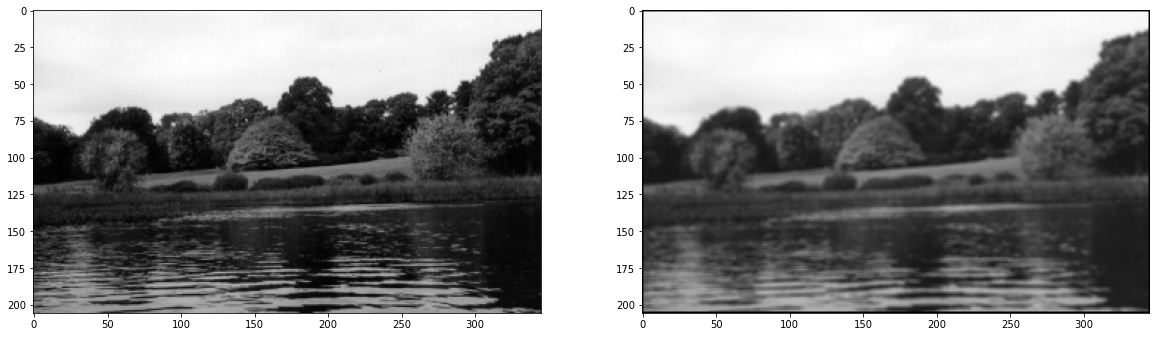

In [27]:
def applyMatrix(Mimamge, Imatrix):
    #convert the image to a numpy array
    Marray = np.array(Mimamge)
    #get the width and height of the image
    Mwidth = len(Marray)
    Mheight = len(Marray[0])
    #create a new array for the output image
    Marray2 = np.zeros((Mwidth, Mheight))

    #move the 3x3 matrix over the image
    for i in range(1, Mwidth-1):
        for j in range(1, Mheight-1):
            #get the 3x3 matrix
            Mmatrix = Marray[i-1:i+2, j-1:j+2]
            #multiply the matrix with the image element wise
            Mmatrix = Mmatrix * Imatrix
            #sum the matrix
            Mmatrix = np.sum(Mmatrix)
            #set the output pixel to the sum
            Marray2[i][j] = Mmatrix

    #convert Marray2 to image
    Mimage2 = PIL.Image.fromarray(Marray2.astype('uint8'))
    return Mimage2

BlurMatrix = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9

BlurImage = applyMatrix(bw, BlurMatrix)

#show the input and output image side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(bw, cmap='gray')
axes[1].imshow(BlurImage, cmap='gray')



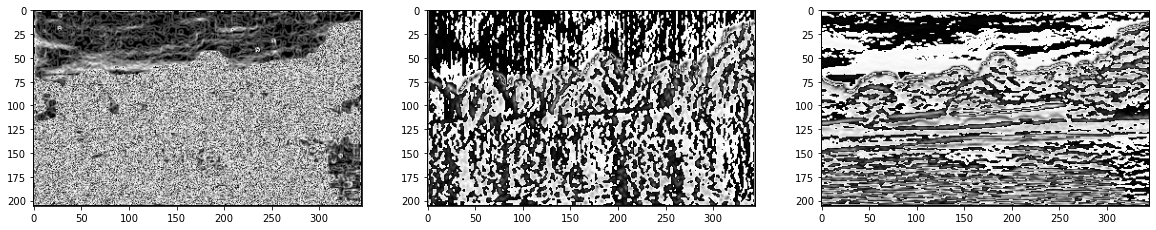

In [29]:
sobelMatrixX = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobelMatrixY = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

sobelImageX = applyMatrix(BlurImage, sobelMatrixX)
sobelImageY = applyMatrix(BlurImage, sobelMatrixY)

#combine the two images
sobelImage = np.sqrt(np.square(sobelImageX) + np.square(sobelImageY))

#plot all 3 images
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
axes[0].imshow(sobelImage, cmap='gray')
axes[1].imshow(sobelImageX, cmap='gray')
axes[2].imshow(sobelImageY, cmap='gray')
